In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def gen_random_with_given_cov(m, Sigma):
    A = np.linalg.cholesky(Sigma)

    z = np.random.normal(size=len(Sigma))

    return m + A @ z

In [7]:
m = np.array([0, 0])
Sigma = np.array([[1, 0.5], [0.5, 2]])

print(gen_random_with_given_cov(m, Sigma))

[-2.04159845 -0.99791284]


# Problem 2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import load_dataset
from scipy.optimize import curve_fit

# данные из лабораторной работы
data = pd.read_excel("data.xlsx")

T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]

# создание прямой с шумом
true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

In [13]:
def lin_func(x, a, b):
    return a * x + b

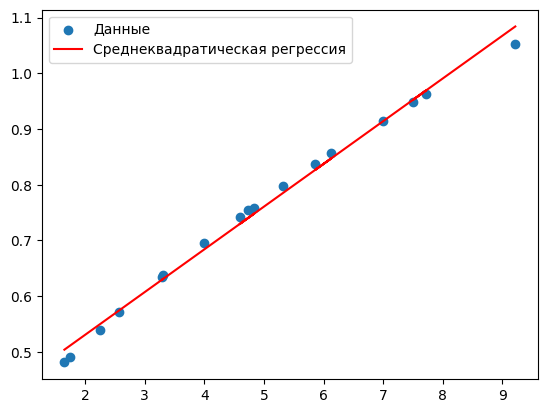

In [14]:
p, cov = curve_fit(lin_func, U, I)

I_pred = lin_func(U, p[0], p[1])

plt.scatter(U, I, label='Данные')
plt.plot(U, I_pred, label='Среднеквадратическая регрессия', color='r')
plt.legend()
plt.show()

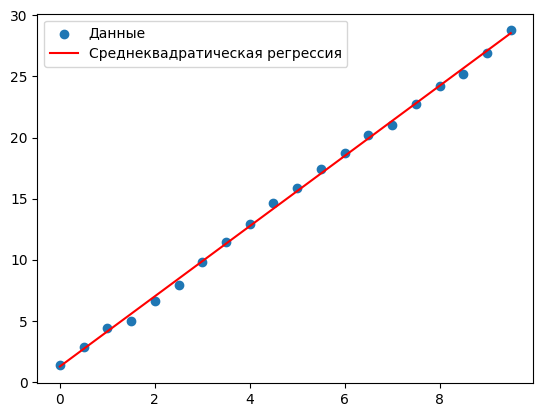

In [15]:
p, cov = curve_fit(lin_func, xs, ys)

ys_pred = lin_func(xs, p[0], p[1])

plt.scatter(xs, ys, label='Данные')
plt.plot(xs, ys_pred, label='Среднеквадратическая регрессия', color='r')
plt.legend()
plt.show()

# Problem 3

$$
\ln MLE(\mu, \sigma) = \ln \prod_i p\left(x_i\right) = \sum_i \ln p\left(x_i\right) = \sum_i \ln \left(\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i-\mu)^2}{2 \sigma^2}}\right) = -n \ln (\sqrt{2\pi}\sigma) - \frac{1}{2\sigma^2} \sum_i (x_i - \mu)^2.
$$

$$
\frac{\partial \ln MLE}{\partial \mu} = \frac{1}{\sigma^2} \left(\sum_i x_i - n \mu \right) = 0 \; \Rightarrow \; \mu = \frac{1}{n} \sum_i x_i
$$

$$
\frac{\partial \ln MLE}{\partial \sigma} = -\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_i (x_i - \mu)^2 = 0 \; \Rightarrow \; \sigma = \sqrt{\frac{1}{n} \sum_i (x_i - \mu)^2}
$$

# Problem 4

1. Нормировка:
$$
\begin{array}{r}
\tilde{y} \sim \frac{1}{(2 \pi)^{l / 2} \sqrt{\operatorname{det} A^{-1}}} \exp \left(-\frac{(\tilde{y}-y)^T A (\tilde{y}-y)}{2}\right) = \\
= \frac{1}{(2 \pi)^{l / 2} \sqrt{\operatorname{det} A^{-1}}} \exp \left(-\frac{(S z)^T A S z}{2}\right) = \\
= \frac{1}{(2 \pi)^{l / 2} \sqrt{\operatorname{det} A^{-1}}} \exp \left(-\frac{z^T S^T A S z}{2}\right) = \\
= \frac{1}{(2 \pi)^{l / 2} \sqrt{\operatorname{det} D^{-1}}} \exp \left(-\frac{z^T D z}{2}\right).
\end{array}
$$
Поскольку $\int d^l z \exp \left(-\frac{z^T D z}{2}\right) = (2 \pi)^{l/2} \sqrt{\operatorname{det} D^{-1}} $, то распределение правильно нормировано.

3. Из семинара: $\left\langle\left\langle\tilde{y}_i \tilde{y}_j\right\rangle\right\rangle = A_{ij}$.

# Problem 5

1. $$
\sigma_{\mathrm{w}_\alpha}^2\stackrel{\text{def}}{=}\left\langle\tilde{\mathrm{w}}_\alpha \tilde{\mathrm{w}}_\alpha\right\rangle=Q_{\alpha i} \cdot Q_{\alpha j} \cdot \left\langle\tilde{y}_i \tilde{y}_j\right\rangle = \left(QA Q^{\top}\right)_{\alpha \alpha}
$$
2. $$
\sigma_{\mathrm{w}_\alpha}^2 = \left(X^{\top} X\right)^{-1}_{\alpha \alpha} \cdot s_i^2
$$

# Problem 6*

$$
\tilde{\mathbf{w}}=\left(X^{\top} X\right)^{-1} X^{\top} \cdot \mathbf{y}
$$

$$
\tilde{\mathrm{w}}_{\alpha} = \left(X^{\top} X\right)^{-1}_{\alpha k} \cdot f_k(\tilde{x}_i) \cdot y_i
$$

$$
\sigma_{\mathrm{w}_\alpha}^2=\left\langle\tilde{\mathrm{w}}_\alpha \tilde{\mathrm{w}}_\alpha\right\rangle= \left(X^{\top} X\right)^{-1}_{\alpha k} \cdot f_k(\tilde{x}_i) \cdot y_i \cdot \left(X^{\top} X\right)^{-1}_{\alpha l} \cdot f_l(\tilde{x}_j) \cdot y_j = \left(X^{\top} X\right)^{-2} \left(X'^{\top} X'\right) \cdot s^2 \cdot y^{\top} y
$$

Здесь какая-то хрень получается, можно посчитать точно в случае линейного приближения